In [45]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image
import shutil

from sklearn.model_selection import train_test_split

In [3]:
data_dir = "../dataset/"

In [7]:
image_paths = glob(os.path.join(data_dir, "*/*.jpg"))
print(f"total number of images: {len(image_paths)}")

total number of images: 4317


In [11]:
labels = [os.path.basename(os.path.dirname(path)) for path in image_paths]
print(list(set(labels)))

['daisy', 'dandelion', 'rose', 'tulip', 'sunflower']


In [17]:
df = pd.DataFrame({
    "image_path": image_paths,
    "label": labels,
})

In [18]:
df.head()

,image_path,label
0,../dataset\daisy\100080576_f52e8ee070_n.jpg,daisy
1,../dataset\daisy\10140303196_b88d3d6cec.jpg,daisy
2,../dataset\daisy\10172379554_b296050f82_n.jpg,daisy
3,../dataset\daisy\10172567486_2748826a8b.jpg,daisy
4,../dataset\daisy\10172636503_21bededa75_n.jpg,daisy


In [19]:
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=42)
print(f"train set size: {len(train_df)}")
print(f"test set size: {len(test_df)}")

train set size: 3453
test set size: 864


In [22]:
#create directories for training and testing datasets
train_dir = "../dataset/data/train_dir/"
test_dir = "../dataset/data/test_dir/"

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [26]:
for _, row in train_df.iterrows():
    label_dir = os.path.join(train_dir, row['label'])
    os.makedirs(label_dir, exist_ok=True)
    shutil.copy(row['image_path'], label_dir)

# Move testing data to the respective folder
for _, row in test_df.iterrows():
    label_dir = os.path.join(test_dir, row['label'])
    os.makedirs(label_dir, exist_ok=True)
    shutil.copy(row['image_path'], label_dir)


In [28]:
print(os.listdir(train_dir))

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [29]:
print(os.listdir(test_dir))

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


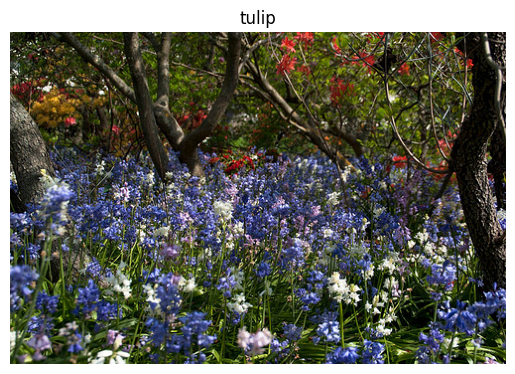

In [49]:
flower_tulip = os.listdir(train_dir+"tulip")
image = os.path.join(train_dir,"tulip",flower_tulip[0])
image = Image.open(image)

plt.imshow(image)
plt.title("tulip")
plt.axis(False)
plt.show()

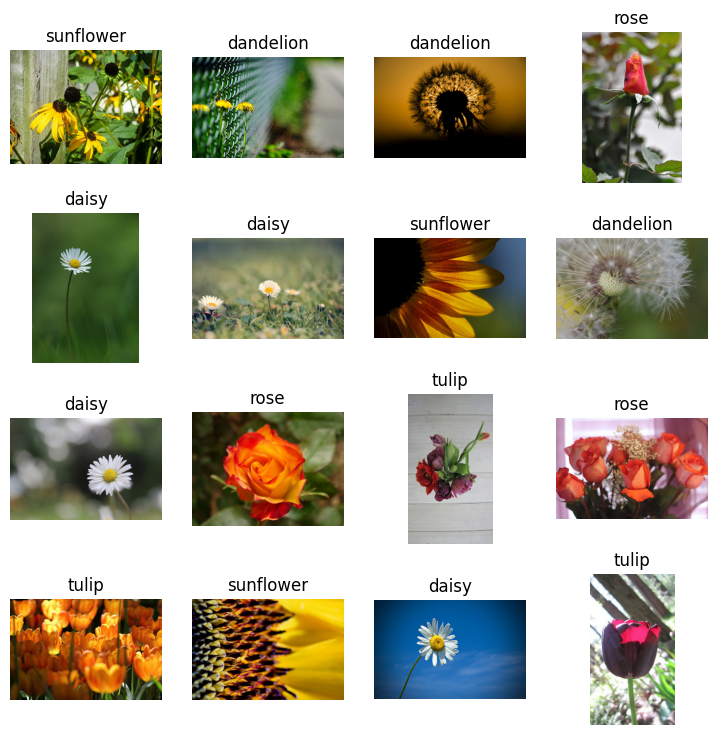

In [83]:
np.random.seed(42)

classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4

for i in range(1, rows*cols+1):
    row = train_df.iloc[i-1]
    image_path = row["image_path"]
    label = row["label"]
    
    fig.add_subplot(rows, cols, i)
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(label)
    plt.axis(False)                         

In [54]:
np.random.seed(42)

classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4

for cls in classes:
    class_dir = os.path.join(train_dir, cls)
    if os.path.exists(class_dir):
        num_files = len(os.listdir(class_dir))
        print(f"{cls}: {num_files} files")
    else:
        print(f'{cls} directory not found.')

daisy: 611 files
dandelion: 842 files
rose: 627 files
sunflower: 586 files
tulip: 787 files


<Figure size 900x900 with 0 Axes>

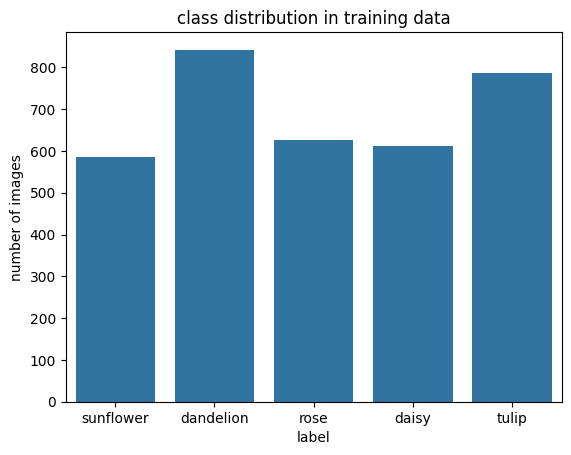

In [86]:
sns.countplot(data=train_df, x="label")
plt.title("class distribution in training data")
plt.ylabel("number of images")
plt.show()